In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt

from IPython.display import SVG
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from time import time
from operator import itemgetter
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score
def run_gridsearch(X,y,clf, param_grid, cv=5):
    #Grid search for best Decision tree parameters.
    #x-features
    #y-targets
    #cf=Decision tree
    #param_grid-- [dict] 
    grid_search=GridSearchCV(clf, param_grid=param_grid, cv=cv)
    grid_search.fit(X,y)
    
    top_params=report(grid_search.grid_scores_,3)
    return top_params

def report(grid_scores, n_top=2):
    top_scores=sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("parameters: ".format(score.parameters))
        print("")
    return top_scores[0].parameters

def run_randomsearch(X,y, clf, param_dist, cv=5, n_iter_search=20):
    #Run a random search for best Decision Tree parameters.
    random_search=RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)
    random_search.fit(X,y)
    top_params=report(random_search.grid_scores_,3)
    return top_params

C:\Users\pc\Anaconda3\envs\py3k\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\pc\Anaconda3\envs\py3k\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


C:\Users\pc\Anaconda3\envs\py3k\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In-sample survivor percentage:
80.1242236025
In-sample Fatality percentage:
93.9524838013

Out-sample survivor percentage:
74.7191011236
Out-sample Fatality percentage:
98.8439306358
mean: 0.743(std: 0.054098)


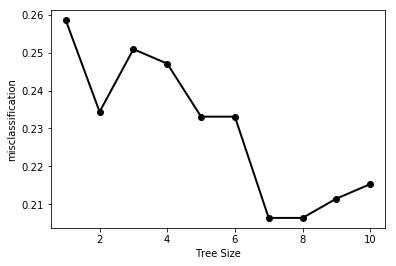

parameters: 

parameters: 

parameters: 

Best Parameters
parameters max_leaf_nodes       setting: 7 
test best parameters: 
means: 0.794 std: 0.057 

In-sample survivor percentage after pruning:
73.602484472
In-sample Fatality percentage after pruning:
84.6652267819

Out-sample survivor percentage after pruning:
70.7865168539
Out-sample Fatality percentage after pruning:
87.2832369942


In [6]:
data=pd.read_csv("Titanic.csv",index_col=0)
data=data[['pclass','sex','age','sibsp','survived']]
#split data 60% training 40% test
train, test = train_test_split(data, train_size = 0.6) #0.6 means 60% of train data
#print(train)

#calculating the mean of all ages in traindf and filling NaN values
meanAge=train.age.mean()
train.age=train.age.fillna(meanAge)

#Convert Sex to Int type for decision trees
train.sex = train.sex.map({'female': 0, 'male': 1}).astype(int)

#Fill the ermpty pclass values by 3 as majority are 3rd
train.pclass = train.pclass.fillna("3rd")

#Mapping the pclass TO 1,2,3
train.pclass = train.pclass.map({'1st':1, '2nd':2, '3rd':3}).astype(int)

#calculating the mean of all sibsp in traindf and filling NaN values
meansibsp=train.sibsp.mean()
train.sibsp=train.sibsp.fillna(meansibsp)

train_in = train[['pclass','sex','age','sibsp']]
target=train[['survived']].values
train_data=train_in.values


clf = DecisionTreeClassifier()
clf = clf.fit(X=train_data,y=target)
#Train the decision tree using Training Dataset
feature_names= ["pclass", "sex","age","sibsp"]
dotfile="tree.dot"
pngfile="tree.png"
with open(dotfile,"w") as f:
    export_graphviz(clf, out_file=f,feature_names=feature_names)
command=["dot","-Tpng",dotfile,"-o",pngfile]
train_survived=train_in[target==1].values
train_fatal=train_in[target==0].values

survivor = clf.predict(train_survived)
fatal=clf.predict(train_fatal) #predicting for fatalitites

print("In-sample survivor percentage:")
print (accuracy_score(target[target==1],survivor)*100) #in-sample percent
print("In-sample Fatality percentage:")
print (accuracy_score(target[target==0],fatal)*100) #in-sample percent for fatality



#Test data
meanAge=test.age.mean()
test.age=test.age.fillna(meanAge)

#Convert Sex to Int type for decision trees
test.sex = test.sex.map({'female': 0, 'male': 1}).astype(int)

#Fill the empty pclass values by 3 as majority are 3rd
test.pclass = test.pclass.fillna("3rd")

#Mapping the pclass TO 1,2,3
test.pclass = test.pclass.map({'1st':1, '2nd':2, '3rd':3}).astype(int)

#calculating the mean of all sibsp in traindf and filling NaN values
meansibsp=test.sibsp.mean()
test.sibsp=test.sibsp.fillna(meansibsp)

test_in = test[['pclass','sex','age','sibsp']]
test_target=test[['survived']].values
test_data=test_in.values

#print(train)
clf_tes = DecisionTreeClassifier()
clf_tes = clf_tes.fit(X=test_data,y=test_target)

#Train the decision tree using Training Dataset
dotfile="tree_test.dot"
pngfile="tree_test.png"
with open(dotfile,"w") as f:
    export_graphviz(clf_tes, out_file=f,feature_names=feature_names)
command=["dot","-Tpng",dotfile,"-o",pngfile]
test_survived=test_in[test_target==1].values
test_fatal=test_in[test_target==0].values
survivor_test = clf_tes.predict(test_survived)
fatal_test=clf_tes.predict(test_fatal)

#Print The accuracy 
print("\nOut-sample survivor percentage:")
print(accuracy_score(test_target[test_target==1],survivor_test)*100) #out-sample percent
print("Out-sample Fatality percentage:")
print(accuracy_score(test_target[test_target==0],fatal_test)*100) #out-sample percent

#Cross-validation
#scores=cross_val_score(clf_tes,test_data,test_target, cv=10) #k-fold cross validation
dt=DecisionTreeClassifier()
dt.fit(train_in,train[['survived']])

scores=cross_val_score(estimator=dt,X=train_data,y=train['survived'].values,cv=10)
print("mean: {:.3f}(std: {:3f})".format(scores.mean(),scores.std()))
max_leaf_nodes=[None]+[2,3,4,5,6,7,8,9,10]
param_grid={"max_leaf_nodes":max_leaf_nodes}

#Grid search...
misclassification = []

grid_search = GridSearchCV(dt, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(train_data, train['survived'])
for score in grid_search.grid_scores_:
     misclassification.append(1-score[1])
max_leaf_nodes[0] = 1     
plt.plot(max_leaf_nodes, misclassification, 'k', linewidth = 2)
plt.plot(max_leaf_nodes, misclassification, 'ko')
plt.xlabel("Tree Size")
plt.ylabel("misclassification")
plt.show()
max_leaf_nodes=[None]+[2,3,4,5,6,7,8,9,10]
param_grid={"max_leaf_nodes":max_leaf_nodes}


ts_gs=run_gridsearch(train_data,train['survived'].values,dt,param_grid,cv=10)

print("Best Parameters")
for k, v in ts_gs.items():
    print("parameters {:<20s} setting: {} ".format(k,v))
print("test best parameters: ")
dt_ts_rs=DecisionTreeClassifier(**ts_gs)
scores=cross_val_score(dt_ts_rs, train_data, train["survived"].values,cv=10)
print("means: {:.3f} std: {:.3f} ".format(scores.mean(),scores.std()))


feature_names= ["pclass", "sex","age","sibsp"]
dotfile="tree_prune.dot"
pngfile="tree_prune.png"
dt_ts_rs = dt_ts_rs.fit(X=train_data,y=target)

with open(dotfile,"w") as f:
    export_graphviz(dt_ts_rs, out_file=f,feature_names=feature_names)
command=["dot","-Tpng",dotfile,"-o",pngfile]
train_survived_prune=train_in[target==1].values
train_fatal_prune=train_in[target==0].values
survivor_train_prune = dt_ts_rs.predict(train_survived)
fatal_train_prune=dt_ts_rs.predict(train_fatal)


#Print The accuracy 
print("\nIn-sample survivor percentage after pruning:")
print(accuracy_score(target[target==1],survivor_train_prune)*100) #out-sample percent
print("In-sample Fatality percentage after pruning:")
print(accuracy_score(target[target==0],fatal_train_prune)*100) #out-sample percent



test_survived_prune=test_in[test_target==1].values
test_fatal_prune=test_in[test_target==0].values
survivor_test_prune = dt_ts_rs.predict(test_survived)
fatal_test_prune=dt_ts_rs.predict(test_fatal)

#Print The accuracy 
print("\nOut-sample survivor percentage after pruning:")
print(accuracy_score(test_target[test_target==1],survivor_test_prune)*100) #out-sample percent
print("Out-sample Fatality percentage after pruning:")
print(accuracy_score(test_target[test_target==0],fatal_test_prune)*100) #out-sample percent

